In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_dataset = train_datagen.flow_from_directory(
        'train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode='sparse'
)

Found 1721 images belonging to 3 classes.


In [5]:
train_dataset.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [6]:
class_names = list(train_dataset.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
count=0
for image_batch, label_batch in train_dataset:
#     print(label_batch)
    print(image_batch[0])
    break


[[[0.70987606 0.68634665 0.6941898 ]
  [0.7094866  0.6859572  0.69380033]
  [0.70913315 0.68560374 0.6934469 ]
  ...
  [0.7255026  0.70589477 0.72158104]
  [0.69427836 0.6746705  0.6903568 ]
  [0.6785756  0.65896773 0.674654  ]]

 [[0.7175868  0.6940574  0.70190054]
  [0.71698046 0.69345105 0.7012942 ]
  [0.7162736  0.6927442  0.70058733]
  ...
  [0.7226959  0.70308805 0.7187743 ]
  [0.69278437 0.6731765  0.6888628 ]
  [0.68065304 0.6610452  0.67673147]]

 [[0.70586586 0.6823241  0.6901714 ]
  [0.7069303  0.68340087 0.691244  ]
  [0.7079905  0.6844611  0.69230425]
  ...
  [0.7198686  0.70026076 0.71594703]
  [0.69137067 0.6717628  0.6874491 ]
  [0.6831269  0.6635191  0.67920536]]

 ...

 [[0.51553154 0.46847275 0.48415902]
  [0.5053945  0.45833573 0.474022  ]
  [0.42792693 0.3808681  0.39655438]
  ...
  [0.5217499  0.49822053 0.5139068 ]
  [0.5157419  0.49221247 0.50789875]
  [0.5098617  0.4863323  0.5020186 ]]

 [[0.5187123  0.47165343 0.48733974]
  [0.5036275  0.45656866 0.47225493]


In [14]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_dataset = validation_datagen.flow_from_directory(
        'val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode='sparse'
)

Found 215 images belonging to 3 classes.


In [15]:
for image_batch, label_batch in validation_dataset:
    print(image_batch[0])
    break

[[[0.6282603  0.56159365 0.5929662 ]
  [0.6140516  0.5489595  0.5795448 ]
  [0.5718838  0.5130602  0.5405112 ]
  ...
  [0.7137461  0.65492254 0.6823735 ]
  [0.71096474 0.6521412  0.6795922 ]
  [0.7080602  0.6492367  0.67668766]]

 [[0.6278454  0.56117874 0.5925513 ]
  [0.62318015 0.5572583  0.58825845]
  [0.55736095 0.49853742 0.5259884 ]
  ...
  [0.68657243 0.6277489  0.6551999 ]
  [0.6940946  0.6352711  0.66272205]
  [0.70280826 0.64398474 0.6714357 ]]

 [[0.6288273  0.5621606  0.59353316]
  [0.63133    0.56466335 0.5960359 ]
  [0.54651856 0.48756593 0.51508147]
  ...
  [0.7672716  0.70844805 0.73589903]
  [0.7546128  0.6957893  0.72324026]
  [0.73801523 0.6791917  0.7066427 ]]

 ...

 [[0.59760904 0.532473   0.5552372 ]
  [0.59677917 0.5308133  0.55399233]
  [0.59543276 0.5285724  0.5522955 ]
  ...
  [0.57537293 0.5087063  0.5400788 ]
  [0.5099742  0.4433075  0.47468004]
  [0.52585995 0.4591933  0.49056584]]

 [[0.56473595 0.48866653 0.5215987 ]
  [0.5605866  0.48327234 0.5174493 ]


In [17]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_dataset = test_datagen.flow_from_directory(
        'test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode='sparse'
)

Found 216 images belonging to 3 classes.


In [18]:
for image_batch, label_batch in test_dataset:
    print(image_batch[0])
    break

[[[0.4117069  0.35288337 0.38033435]
  [0.41155502 0.3527315  0.38018247]
  [0.41140315 0.35257962 0.3800306 ]
  ...
  [0.50811666 0.46497947 0.49635202]
  [0.53345203 0.49031475 0.5216873 ]
  [0.5352074  0.49207014 0.5234427 ]]

 [[0.41375518 0.35493162 0.3823826 ]
  [0.41383108 0.35500756 0.38245854]
  [0.41390702 0.3550835  0.38253447]
  ...
  [0.5088001  0.46566284 0.49703538]
  [0.5337557  0.49061847 0.521991  ]
  [0.5349796  0.49184233 0.5232149 ]]

 [[0.40790397 0.3490804  0.3765314 ]
  [0.4080558  0.3492323  0.37668326]
  [0.40820765 0.34938413 0.3768351 ]
  ...
  [0.50948346 0.46634623 0.49771878]
  [0.53405946 0.49092218 0.52229476]
  [0.5347518  0.49161452 0.52298707]]

 ...

 [[0.35577804 0.30479765 0.34401333]
  [0.3775238  0.3265434  0.36575907]
  [0.38467824 0.33369786 0.37291354]
  ...
  [0.5860923  0.55471975 0.60570014]
  [0.5861682  0.5547957  0.6057761 ]
  [0.58624417 0.5548716  0.605852  ]]

 [[0.35623363 0.30525324 0.34446892]
  [0.37790343 0.32692304 0.36613873]


In [19]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

In [20]:
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [22]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [23]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    train_dataset,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_dataset,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 110s 2s/step - loss: 0.9222 - accuracy: 0.4556 - val_loss: 0.8724 - val_accuracy: 0.4896
Epoch 2/20
47/47 [==============================] - 91s 2s/step - loss: 0.8716 - accuracy: 0.5177 - val_loss: 0.8118 - val_accuracy: 0.5677
Epoch 3/20
47/47 [==============================] - 91s 2s/step - loss: 0.7085 - accuracy: 0.6900 - val_loss: 0.6845 - val_accuracy: 0.6510
Epoch 4/20
47/47 [==============================] - 91s 2s/step - loss: 0.5251 - accuracy: 0.7849 - val_loss: 0.5086 - val_accuracy: 0.8073
Epoch 5/20
47/47 [==============================] - 93s 2s/step - loss: 0.3600 - accuracy: 0.8617 - val_loss: 0.4174 - val_accuracy: 0.8333
Epoch 6/20
47/47 [==============================] - 93s 2s/step - loss: 0.3378 - accuracy: 0.8544 - val_loss: 0.4141 - val_accuracy: 0.8542
Epoch 7/20
47/47 [==============================] - 94s 2s/step - loss: 0.2714 - accuracy: 0.8925 - val_loss: 0.2461 - val_accuracy: 0.9115
Epoch 8/20
47/47 [=

In [26]:
predictions = model.predict(test_dataset,verbose=1)
import numpy as np
class_index = test_dataset.classes
pred = predictions.argmax(axis=1)
print(pred)

7/7 [==============================] - 7s 958ms/step
[1 0 1 1 0 0 1 1 1 1 2 0 1 0 1 0 0 1 1 0 1 0 1 2 1 1 2 1 0 1 0 0 0 2 1 0 0
 0 2 0 0 1 0 0 1 0 0 1 1 0 1 1 1 2 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1
 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1
 0 1 1 0 1 1 2 0 0 0 1 1 0 2 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0
 2 1 1 2 1 0 0 0 2 1 1 1 1 1 2 1 2 0 1 1 1 1 0 2 1 1 1 0 0 2 0 0 0 0 1 1 1
 0 1 0 1 0 0 1 0 2 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 0 1]


In [27]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print(accuracy_score(class_index,pred))

cm = confusion_matrix(class_index,pred)
print(cm)

0.4537037037037037
[[49 45  6]
 [42 48 10]
 [ 8  7  1]]


7/7 [==============================] - 5s 743ms/step


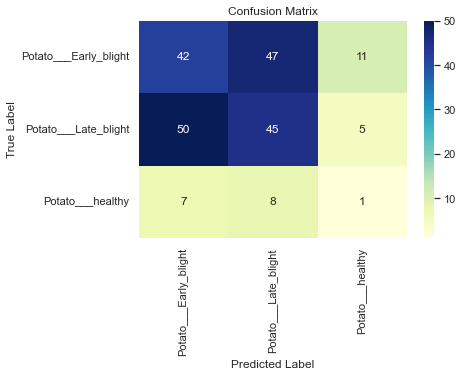

In [28]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation set
validation_labels = test_dataset.classes
validation_pred_probs = model.predict(test_dataset)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_dataset.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [35]:
Categories = {0: "Potato Early Blight", 1: "Potato Late Blight", 2: "Potato Healthy"}

In [36]:
import cv2
def prepare(filepath):
    IMG_SIZE = 256
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE) )
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

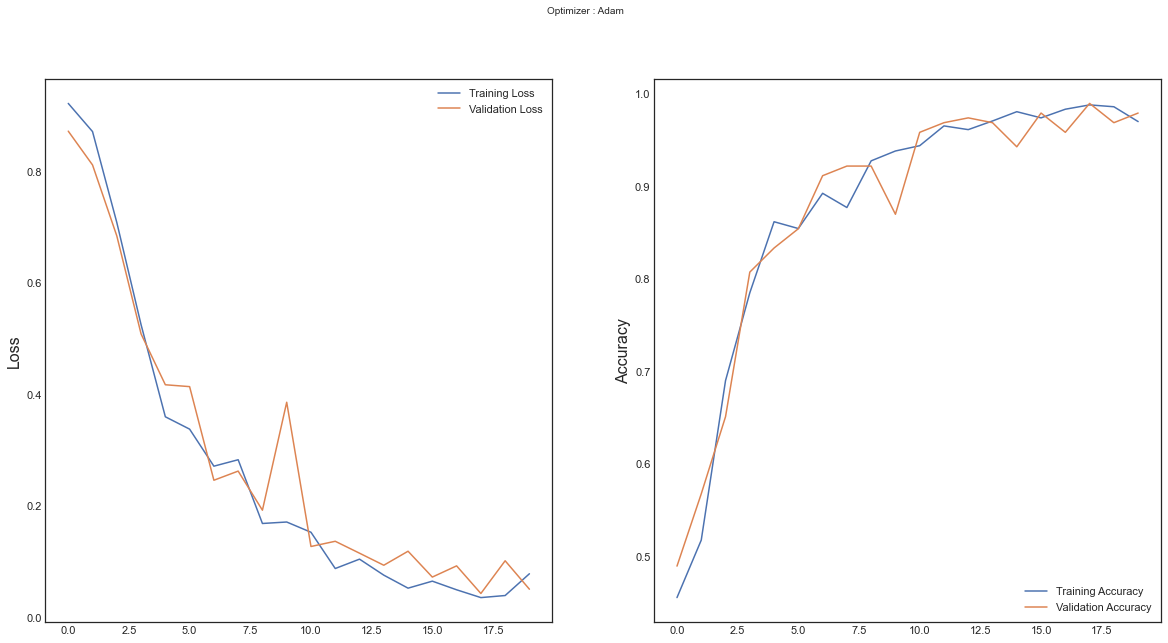

In [44]:
plt.style.use('seaborn-white')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

1/1 [==============================] - 0s 173ms/step
[[9.9297404e-01 6.6531962e-03 3.7272889e-04]]
Potato Early Blight
The above expression is:
99.3 %  Potato Early Blight
0.67 %  Potato Late Blight
0.04 %  Potato Healthy


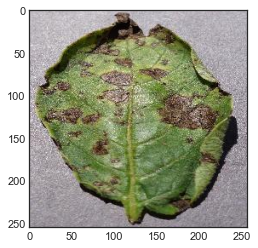

In [45]:
img = plt.imread("eb.JPG")
plt.imshow(img)
path = "eb.JPG"
prediction = model.predict(prepare(path)/255)
print(prediction)
label=prediction.argmax()
label
print(Categories[label])
i = 0
print("The above expression is:")
for perc in prediction[0]:
    print(round(perc*100, 2),"% ",Categories[i])
    i+= 1

1/1 [==============================] - 0s 49ms/step


Text(0.5, 1.0, 'Potato Early Blight')

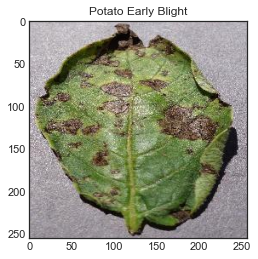

In [46]:
prediction = model.predict(prepare(path)/255)
label = prediction.argmax()
plt.imshow(img)
plt.title(Categories[label])

1/1 [==============================] - 0s 27ms/step
[[0.45006856 0.535187   0.01474444]]
Potato Late Blight
The above expression is:
45.01 %  Potato Early Blight
53.52 %  Potato Late Blight
1.47 %  Potato Healthy


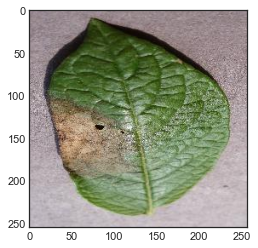

In [47]:
img = plt.imread("lb.JPG")
plt.imshow(img)
path = "lb.JPG"
prediction = model.predict(prepare(path)/255)
print(prediction)
label=prediction.argmax()
label
print(Categories[label])
i = 0
print("The above expression is:")
for perc in prediction[0]:
    print(round(perc*100, 2),"% ",Categories[i])
    i+= 1

1/1 [==============================] - 0s 38ms/step


Text(0.5, 1.0, 'Potato Late Blight')

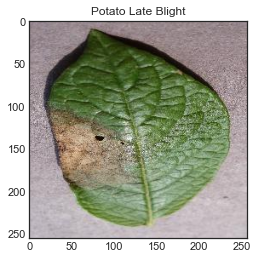

In [48]:
prediction = model.predict(prepare(path)/255)
label = prediction.argmax()
plt.imshow(img)
plt.title(Categories[label])

1/1 [==============================] - 0s 24ms/step
[[0.17322464 0.71135217 0.11542312]]
Potato Late Blight
The above expression is:
17.32 %  Potato Early Blight
71.14 %  Potato Late Blight
11.54 %  Potato Healthy


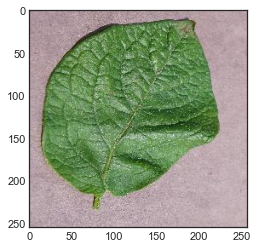

In [49]:
img = plt.imread("ph.JPG")
plt.imshow(img)
path = "ph.JPG"
prediction = model.predict(prepare(path)/255)
print(prediction)
label=prediction.argmax()
label
print(Categories[label])
i = 0
print("The above expression is:")
for perc in prediction[0]:
    print(round(perc*100, 2),"% ",Categories[i])
    i+= 1

1/1 [==============================] - 0s 43ms/step


Text(0.5, 1.0, 'Potato Late Blight')

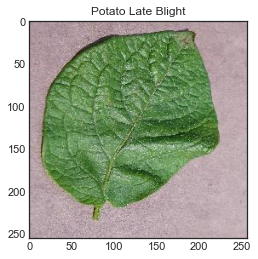

In [50]:
prediction = model.predict(prepare(path)/255)
label = prediction.argmax()
plt.imshow(img)
plt.title(Categories[label])